In [1]:
%%time
from syntheticDBN import Bayes_Test
import pandas as pd
import pyAgrum.lib.notebook as gnb

Wall time: 2.07 s


8/66 random arcs


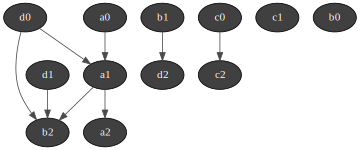

Wall time: 58 ms


In [2]:
%%time
# Create True DBN
timesteps = 3
# nodes = 4
bayestest = Bayes_Test(timesteps=timesteps, type='random') 

gnb.show(bayestest.true_dbn)

In [3]:
%%time
# Score classifiers
targets = list(sorted(bayestest.true_dbn.names(), key=lambda x: x[::-1]))[-4:]

#TODO: DIFFERENT TIMESTEPS!!!!!!!!!!!!!!!!!!

scores = bayestest.time_test(targets=targets, timesteps=timesteps)
scores

Wall time: 15 s


,a2,b2,c2,d2
1.1,0.000,0.676,0.342,0.827
1.2,0.000,0.651,0.362,0.856
1.3,0.000,0.659,0.377,0.860
1.4,0.000,0.676,0.370,0.857
1.5,0.000,0.677,0.364,0.831
1.6,0.000,0.682,0.379,0.840
1.7,0.000,0.658,0.358,0.862
1.8,0.000,0.674,0.343,0.843
1.9,0.000,0.669,0.378,0.844
1.10,0.000,0.667,0.367,0.840


In [4]:
mean_scores = pd.DataFrame([scores.mean(), scores.std()], index=['Mean','STD'])
mean_scores

,a2,b2,c2,d2
Mean,0.468900,0.63866,0.71426,0.569200
STD,0.405464,0.25108,0.35716,0.472921
